## 第2章画像処理の基礎知識

In [1]:
from PIL import Image
import numpy as np

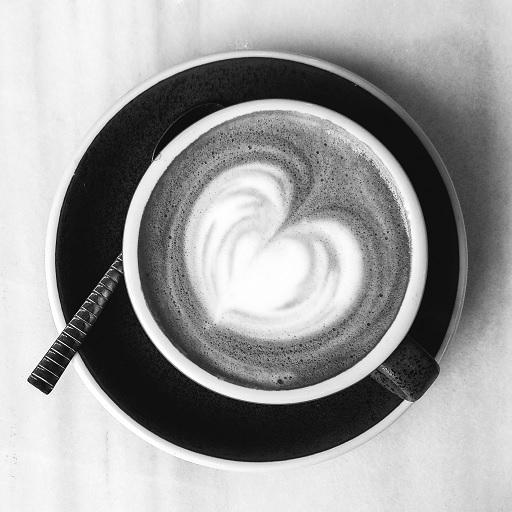

In [2]:
# グレースケール画像の読み込み
img_gray = Image.open("../data/coffee.jpg")

# グレースケール画像を表示
display(img_gray)

In [4]:
# グレースケール画像の配列の形を表示
print('グレースケール画像を保存する配列の形: {}'.format(np.array(img_gray).shape))

# グレースケール画像の原点の画素値を表示
print('グレースケール画像の(0, 0)における画素値: {}'.format(img_gray.getpixel((0, 0))))

グレースケール画像を保存する配列の形: (512, 512)
グレースケール画像の(0, 0)における画素値: 240


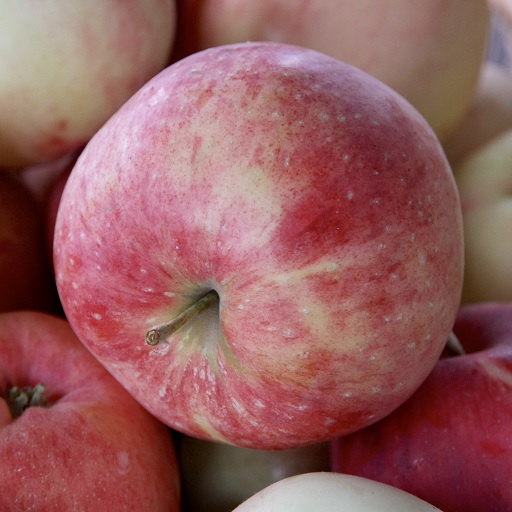

カラー画像を保存する配列の形: (512, 512, 3)
カラー画像の(0, 0)における画素値: (211, 146, 166)


In [7]:
# カラー画像の読み込み
img_color = Image.open("../data/apple.jpg")

# カラー画像の表示
display(img_color)

# カラー画像の配列の形を表示
print('カラー画像を保存する配列の形: {}'.format(np.array(img_color).shape))

# カラー画像の原点の画素値を表示
print('カラー画像の(0, 0)における画素値: {}'.format(img_color.getpixel((255, 255))))

### 平滑化フィルタ

In [16]:
# ガウシアンカーネルを生成する関数
"""
kernel_width: 生成するカーネルの幅
kernel_hight: 生成するカーネルの高さ
sigma       : カーネルの値を決めるがガウス分布の標準偏差
"""
def generate_gaussian_kernel(
    kernel_width: int, kernel_hight: int, sigma: float):
    # カーネルの大きさを奇数に限定
    assert kernel_width % 2 == 1 and kernel_hight % 2 == 1
    
    # カーネル用の変数を用意
    kernel = np.empty((kernel_hight, kernel_width))
    
    for y in range(-(kernel_hight // 2), kernel_hight // 2 + 1):
        for x in range(-(kernel_width // 2), kernel_width // 2 + 1):
            # ガウス分布から値を抽出しカーネルに代入
            h = -(x ** 2 + y ** 2) / (2 * sigma ** 2)
            h = np.exp(h) / np.sqrt(2 * np.pi * sigma ** 2)
            kernel[y + kernel_hight // 2, x + kernel_width // 2] = h
            
    # カーネルの和が1になるように正規化
    kernel /= np.sum(kernel)
    
    return kernel

In [24]:
# 畳み込み演算を行う関数
"""
img   : 畳み込み演算を適用する画像
kernel: 平滑化フィルターのカーネル, [カーネルの高さ, カーネルの幅]
x     : カーネルの中心となる画像上のx座標
y     : カーネルの中心となる画像上のy座標
"""
def convolution(
    img: Image.Image, kernel: np.ndarray, x: int, y: int):
    # 画像サイズとカーネルサイズの取得
    width, height = img.size
    kernel_height, kernel_width = kernel.shape[:2]
    
    # 畳み込み演算
    value = 0
    for y_kernel in range(-(kernel_height // 2), kernel_height // 2 + 1):
        for x_kernel in range(-(kernel_width // 2), kernel_width // 2 + 1):
            # カーネルが画像からはみ出る場合、端の座標を取得
            x_img = max(min(x + x_kernel, width - 1), 0)
            y_img = max(min(y + y_kernel, height - 1), 0)
            # カーネルの重みづけした値で更新
            h = kernel[y_kernel + kernel_height // 2,
                       x_kernel + kernel_width // 2]
            value += h * img.getpixel((x_img, y_img))
            
    return value

In [25]:
# 画像にカーネルを適用する関数
"""
img   : 平滑化フィルタを適用する画像
kernel: 平滑化フィルタのカーネル, [カーネルの高さ, カーネルの幅]
"""
def apply_filter(
    img: Image.Image, kernel: np.ndarray):
    # 画像サイズとカーネルサイズの取得
    width, height = img.size
    
    # フィルタ適用後の画像を保存する変数を用意
    img_filtered = Image.new(mode='L', size=(width, height))
    
    # フィルタ適用後の各画素値の計算
    for y in range(height):
        for x in range(width):
            filtered_value = convolution(img, kernel, x, y)
            img_filtered.putpixel((x, y), int(filtered_value))
            
    return img_filtered

In [26]:
# カーネルの生成
# ガウシアンカーネルの生成
kernel = generate_gaussian_kernel(kernel_hight=5, kernel_width=5, sigma=1.3)

# カーネルの表示
print('ガウシアンカーネル: ')
print(kernel)

ガウシアンカーネル: 
[[0.0097565  0.02370077 0.03186045 0.02370077 0.0097565 ]
 [0.02370077 0.0575746  0.07739634 0.0575746  0.02370077]
 [0.03186045 0.07739634 0.10404229 0.07739634 0.03186045]
 [0.02370077 0.0575746  0.07739634 0.0575746  0.02370077]
 [0.0097565  0.02370077 0.03186045 0.02370077 0.0097565 ]]


元のノイズ画像


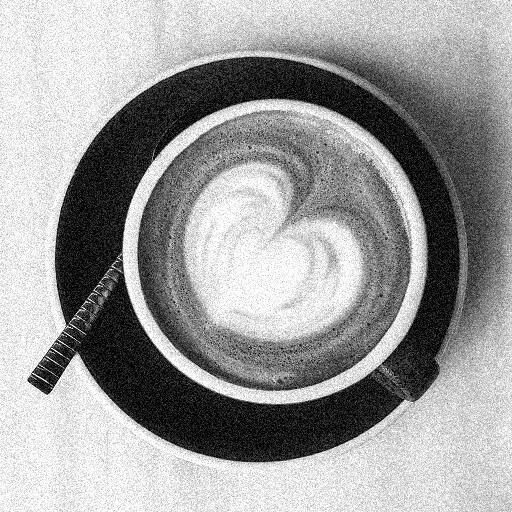

フィルタ適用後の画像


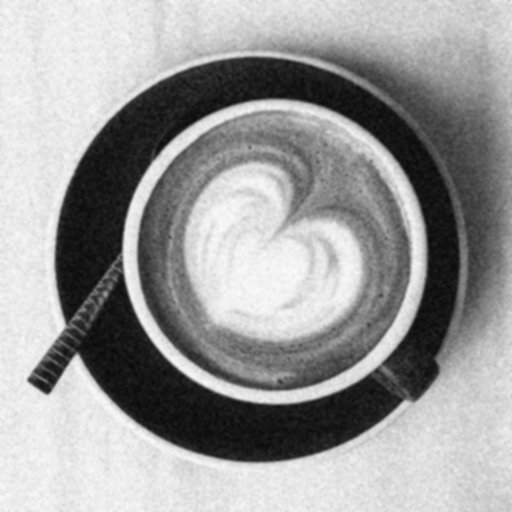

In [28]:
# ガウシアンフィルタの適用
# 画像の読み込み
img = Image.open("../data/coffee_noise.jpg")

# ガウシアンフィルタの適用
img_filtered = apply_filter(img, kernel)

# 元画像とフィルタ適用後の画像を表示
print('元のノイズ画像')
display(img)
print('フィルタ適用後の画像')
display(img_filtered)

### バイラテラルフィルタ

In [5]:
import cv2
import numpy as np
from PIL import Image

img = cv2.imread("../data/coffee_noise.jpg")
img_bilateralfiltered = cv2.bilateralFilter(img, d=9, sigmaColor=50, sigmaSpace=20)
cv2.imwrite("bilateralfiltered_img.jpg", img_bilateralfiltered)

True

### 畳み込み演算を使った特徴量抽出

- エッジ特徴量
- ラプラシアンフィルタ

In [12]:
from scipy import signal

# エッジ特徴量抽出のためのカーネル生成関数
def generate_kernel():
    # カーネル用の変数を用意
    kernel_h = np.zeros((3, 3))
    kernel_v = np.zeros((3, 3))
    kernel_lap = np.zeros((3, 3))
    
    # 水平方向の1次微分のカーネルの値を設定
    kernel_h[1, 1] = -1
    kernel_h[1, 2] = 1
    # 垂直方向の1次微分のカーネルの値を設定
    kernel_v[1, 1] = -1
    kernel_v[2, 1] = 1
    # ラプラシアンフィルタのカーネルの値を設定
    kernel_lap[0, 1] = 1
    kernel_lap[1, 0] = 1
    kernel_lap[1, 2] = 1
    kernel_lap[2, 1] = 1
    kernel_lap[1, 1] = -4
    
    return kernel_h, kernel_v, kernel_lap

In [13]:
# エッジ特徴量抽出に使うカーネルの生成と表示
# 1次微分とラプラシアンフィルタのカーネルを生成
kernel_h, kernel_v, kernel_lap = generate_kernel()

print('水平方向の1次微分カーネル')
print(kernel_h)
print('垂直方向の1次微分カーネル')
print(kernel_v)
print('ラプラシアンフィルタのカーネル')
print(kernel_lap)

水平方向の1次微分カーネル
[[ 0.  0.  0.]
 [ 0. -1.  1.]
 [ 0.  0.  0.]]
垂直方向の1次微分カーネル
[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  1.  0.]]
ラプラシアンフィルタのカーネル
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


In [14]:
# エッジ特徴量の抽出
# 画像の読み込み
img = Image.open("../data/coffee.jpg")

# NumpyとSciPyを使うため画像をNumpy配列に変換
img = np.asarray(img, dtype='int32')

# 畳み込み演算
img_h_diff = signal.convolve2d(
    img, kernel_h, mode='same'
)
img_v_diff = signal.convolve2d(
    img, kernel_v, mode='same'
)
img_lap = signal.convolve2d(
    img, kernel_lap, mode='same'
)

# 微分値の絶対値を計算
img_h_diff = np.absolute(img_h_diff)
img_v_diff = np.absolute(img_v_diff)

# 水平1次微分画像と垂直1次微分画像の合成
img_diff = (img_h_diff ** 2 + img_v_diff ** 2) ** 0.5

In [15]:
# 画像の丸め込み
"""
畳み込み演算の結果は画素値の範囲である0~255を超えている場合がある。
そのため、clip関数を使って画素値の範囲を超えた値を丸め込む。
その後に画像を表す符号なし8bit整数型に戻す
"""
# 範囲を超えた画素値をクリップ
img_h_diff = np.clip(img_h_diff, 0, 255).astype('uint8')
img_v_diff = np.clip(img_v_diff, 0, 255).astype('uint8')
img_diff = np.clip(img_diff, 0, 255).astype('uint8')
img_lap = np.clip(img_lap, 0, 255).astype('uint8')

水平方向の1次微分フィルタを適用した画像


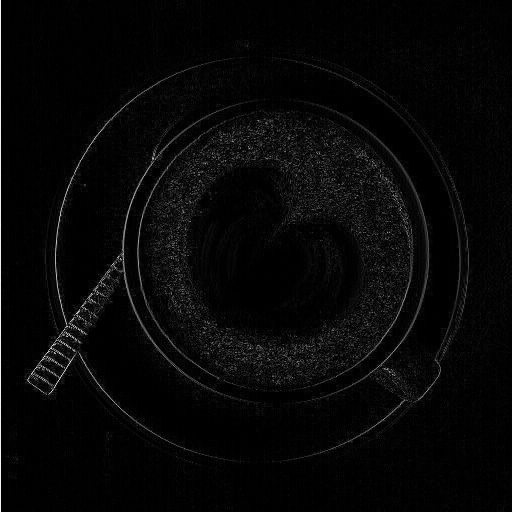

垂直方向の1次微分フィルタを適用した画像


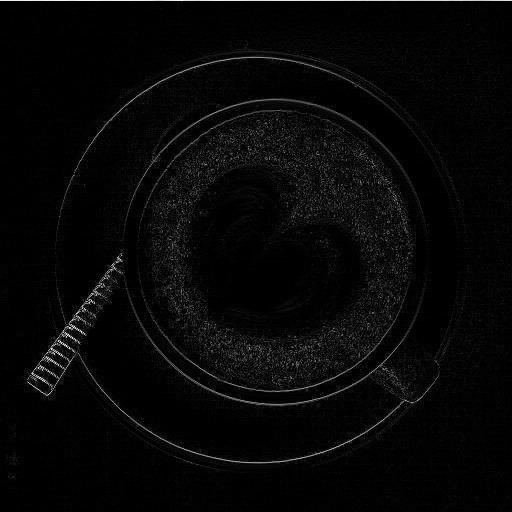

両方向の1次微分フィルタを適用した画像


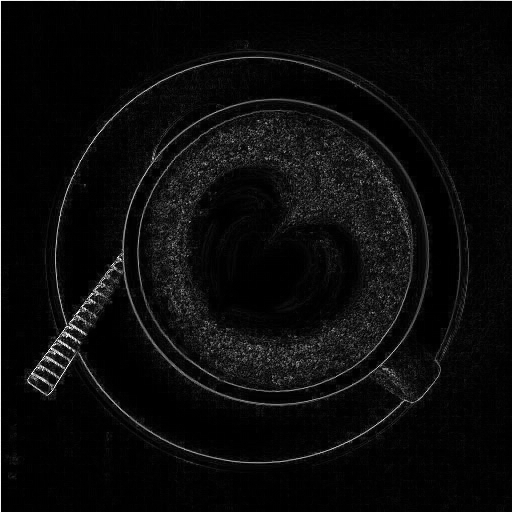

ラプラシアンフィルタを適用した画像


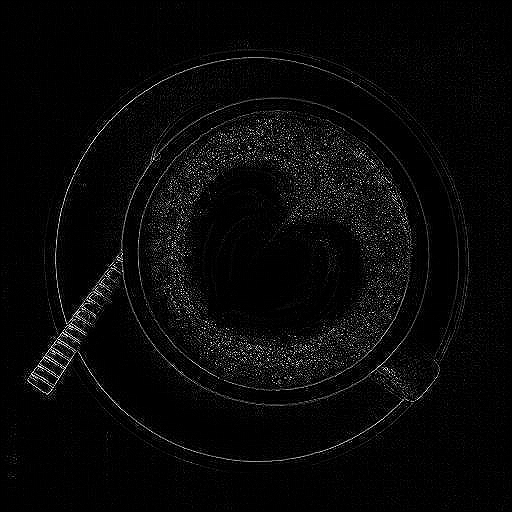

In [16]:
# エッジ特徴量の表示
# Numpy配列をPIL画像に変換
img_h_diff = Image.fromarray(img_h_diff)
img_v_diff = Image.fromarray(img_v_diff)
img_diff = Image.fromarray(img_diff)
img_lap = Image.fromarray(img_lap)

print('水平方向の1次微分フィルタを適用した画像')
display(img_h_diff)
print('垂直方向の1次微分フィルタを適用した画像')
display(img_v_diff)
print('両方向の1次微分フィルタを適用した画像')
display(img_diff)
print('ラプラシアンフィルタを適用した画像')
display(img_lap)

### アテンションを使った特徴量抽出

コスモスの画像:


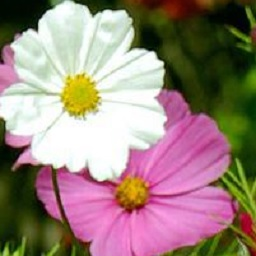

In [18]:
# 画像の特徴空間への射影
# 画像の読み込み
img = Image.open("../data/cosmos.jpg")

# 画像を特徴空間に射影
w = np.array([[ 0.0065, -0.0045, -0.0018,  0.0075,
                0.0095,  0.0075, -0.0026,  0.0022],
              [-0.0065,  0.0081,  0.0097, -0.0070,
               -0.0086, -0.0107,  0.0062, -0.0050],
              [ 0.0024, -0.0018,  0.0002,  0.0023,
                0.0017,  0.0021, -0.0017,  0.0016]])
features = np.matmul(img, w)
print('コスモスの画像:')
display(img)

In [19]:
# アテンションの計算
# アテンション計算用の特徴を画像から抽出
feture_white = features[50, 50]
feature_pink = features[200, 200]

# アテンションの計算
atten_white = np.matmul(features, feture_white)
atten_pink = np.matmul(features, feature_pink)

# ソフトマックス計算
atten_white = np.exp(atten_white) / np.sum(np.exp(atten_white))
atten_pink = np.exp(atten_pink) / np.sum(np.exp(atten_pink))

白のコスモスに対するアテンション:


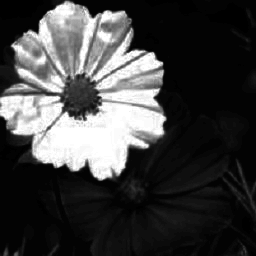

ピンクのコスモスに対するアテンション:


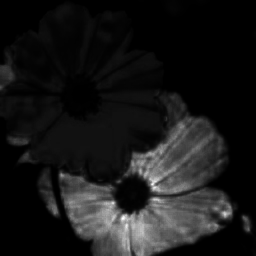

In [23]:
# アテンションの表示
# 表示用にamx, amin関数で最大値,最小値で正規化
atten_white = (atten_white - np.amin(atten_white)) / \
    (np.amax(atten_white) - np.amin(atten_white))
atten_pink = (atten_pink - np.amin(atten_pink)) / \
    (np.amax(atten_pink) - np.amin(atten_pink))

# NumPy配列をPIL画像に変換
img_atten_white = Image.fromarray((atten_white * 255).astype('uint8'))
img_atten_pink = Image.fromarray((atten_pink * 255).astype('uint8'))
print('白のコスモスに対するアテンション:')
display(img_atten_white)
print('ピンクのコスモスに対するアテンション:')
display(img_atten_pink)